# Tensorflow probabilistico
Es una libreria disponible de TenforFlow  para modelos probabilisticos de aprendizaje profundo podemos checar documentacion [aquí](https://tensorflow.org/probability)

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.1.0
TFP version: 0.9.0


In [5]:
# Additional imports and setting fixed random seed to have reproducibility

import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(123)

# Tensorflow Distributions
Son los objetos de distribución son los bloques básicos para construir modelos probabilisticos capturan las operaciones escenciales 

## Coding Tutorials
#### 1. [Univariate Distributions](#univariate_distributions)
#### 2. [Multivariate Distributions](#multivariate_distributions)
#### 3. [The Independent Distribution](#the_independent_distribution)
#### 4. [Sampling and log probs](#sampling_and_log_probs)
#### 5. [Trainable Distributions](#trainable_distributions)

***
## Univariate distributions
<a id='univariate_distributions'></a>

Son las distribuciones de una variable aleatoria 

Una variable aleatoria se caracteriza por su distribución, es decir, por el reparto de las probabilidades entre todos los valores que tome. Esta distribución se puede representar mediante dos funciones que asignan probabilidad (de diferente forma) a los valores que toma la variable:

$\textbf{Función de distribución}$

Se define la función de distribución de una variable $X$ en un punto $x$ como:
$$F_X(x)=p(X\leqslant x)$$
Esta función en el punto x acumula toda la probabilidad asignada a todos los valores de la variable que se encuentran dentro del intervalo $(-\infty,x)$

$\textbf{Función de probabilidad}$

Si $X$ es una variable aleatoria discreta se define su función de probabilidad en un punto $x$ como:

$$f_X(x)=(X=x)$$
Esta función en el punto $x$ toma la probabilidad del valor $x$. 

In [4]:
#importamos tensorflow como siempre
import tensorflow as tf
#importamos tensorflow probability
import tensorflow_probability as tfp
#llamamos al modulo de distribuciones por
tfd=tfp.distributions

#definimos la distribucion normal como la instancia de un objeto distribucion
#obviamente no es la unica distribucion disponible hay muchas
normal=tfd.Normal(loc=0.,scale=1.)

#note que es un objeto event_shape[] denota la dimension de la variable aleatoria como es unidimensional esta vacio
print(normal)
print()

#podemos tomar un elemento muestra de esta distribucion
print(normal.sample())
print()
#podemos tomar varios elemento muestra de esta distribucion
muestras=4
print(normal.sample(muestras))
print()
#Si la distribucion es continua podemos evaluar la densidad en un punto 
punto=0.5
print(normal.prob(punto))
print()

#podemos obtener el logaritmo natural de la probabilidad dada 
#note que es ln(normal.prob(punto))
punto=0.5
print(normal.log_prob(punto))
print()

#podemos generar un lote de distribuciones en un solo objeto
lote_bernoulli=tfd.Bernoulli(probs=[1,2,3,4])
print(lote_bernoulli)
print()

#podemos ver la forma del lote
print(lote_bernoulli.batch_shape)
print()

#si tomamos distintas muestras las toma independientemente 1 por cada lote
#toma 2 muestras en cada una hay 1 muestra de cada lote
print(lote_bernoulli.sample(2))
print()
#podemos calcular probabilidades
print(lote_bernoulli.prob([1,1,1,1]))
print()
#podemos calcular log de probabilidades
print(lote_bernoulli.log_prob([1,1,1,1]))
print()

#note que al hacer muestreo siempre tenemo la froma (muestreo_shape,lote_shape,evento_shape)

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)

tf.Tensor(-0.8980837, shape=(), dtype=float32)

tf.Tensor([ 0.33875433  0.3449861  -0.6605785  -0.2854994 ], shape=(4,), dtype=float32)

tf.Tensor(0.35206532, shape=(), dtype=float32)

tf.Tensor(-1.0439385, shape=(), dtype=float32)

tfp.distributions.Bernoulli("Bernoulli", batch_shape=[4], event_shape=[], dtype=int32)

(4,)

tf.Tensor(
[[1 1 1 1]
 [1 1 1 1]], shape=(2, 4), dtype=int32)

tf.Tensor([1. 2. 3. 4.], shape=(4,), dtype=float32)

tf.Tensor([0.        0.6931472 1.0986123 1.3862944], shape=(4,), dtype=float32)



# Algunas distribuciones

## Binomial

Si ${\displaystyle X\sim \operatorname {Bin} (n,p)}$ entonces su función de probabilidad está dada por

 ${\displaystyle \operatorname {P} [X=x]={n \choose x}p^{x}(1-p)^{n-x}}$

para ${\displaystyle x=0,1,2,\dots ,n}$, siendo

${\displaystyle \!{n \choose x}={\frac {n!}{x!(n-x)!}}\,\!}$

Cada uno de los experimentos es independiente de los restantes (la probabilidad del resultado de un experimento no depende del resultado del resto). El resultado de cada experimento ha de admitir sólo dos categorías (a las que se denomina éxito y fracaso). El valor de ambas posibilidades ha de ser constante en todos los experimentos, y se denotan como $p$ y $q$ respectivamente o como $p$ y ${\displaystyle 1-p}$ de forma alternativa.

Se designa por $X$  a la variable que mide el número de éxitos que se han producido en los $n$ experimentos.

Cuando se dan estas circunstancias, se dice que la variable $X$ sigue una distribución de probabilidad binomial. 

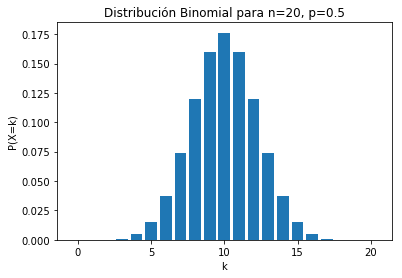

In [5]:
#graficando binomial en python
import matplotlib.pyplot as plt
import scipy.stats as stats

# Definir los parámetros de la distribución binomial
n = 20  # número de ensayos
p = 0.5  # probabilidad de éxito

# Calcular la distribución binomial
dist = stats.binom(n, p)

# Crear una lista de valores de k para graficar
k = range(n+1)

# Obtener la probabilidad de cada valor de k
prob = [dist.pmf(i) for i in k]

# Crear un gráfico de barras para mostrar la distribución binomial
plt.bar(k, prob)
plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.title('Distribución Binomial para n=20, p=0.5')
plt.show()

## Distribucion bernoulli

Es una generalizacion de la binomial
Si $X$ es una variable aleatoria discreta que mide el "número de éxitos" y se realiza un único experimento con dos posibles resultados denominados éxito y fracaso, se dice que la variable aleatoria ${\displaystyle X\,}$ se distribuye como una Bernoulli de parámetro ${\displaystyle p\,}$ con ${\displaystyle 0<p<1}$ y escribimos X ∼ ${\displaystyle X\sim \operatorname {Bernoulli} (p)}$.

Su función de probabilidad es

${\displaystyle \operatorname {P} [X=x]=p^{x}(1-p)^{1-x}\qquad x=0,1}$

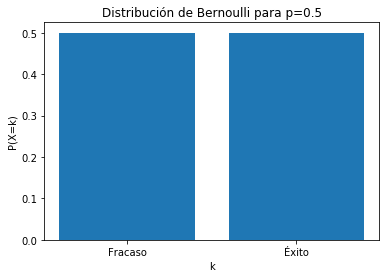

In [6]:
#graficando bernoulli en python
import matplotlib.pyplot as plt
import scipy.stats as stats

# Definir los parámetros de la distribución de Bernoulli
p = 0.5  # probabilidad de éxito

# Crear un objeto de la distribución de Bernoulli
dist = stats.bernoulli(p)

# Crear una lista de valores de k para graficar
k = [0, 1]

# Obtener la probabilidad de cada valor de k
prob = [dist.pmf(i) for i in k]

# Crear un gráfico de barras para mostrar la distribución de Bernoulli
plt.bar(k, prob)
plt.xticks(k, ['Fracaso', 'Éxito'])
plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.title('Distribución de Bernoulli para p=0.5')
plt.show()


## Distribucion Poisson

Sea ${\displaystyle \lambda >0}$ y $X$ una variable aleatoria discreta, si la variable aleatoria $X$ tiene una distribución de Poisson con parámetro $\lambda$ entonces escribiremos ${\displaystyle X\sim \operatorname {Poisson} (\lambda )}$ ${\displaystyle X\sim \operatorname {Poi} (\lambda )}$. 

Si ${\displaystyle X\sim \operatorname {Poisson} (\lambda )}$ entonces la función de probabilidad es

${\displaystyle \operatorname {P} [X=k]={\frac {e^{-\lambda }\lambda ^{k}}{k!}}}$

donde ${\displaystyle k=0,1,2,\dots }$ es el número de ocurrencias del evento o fenómeno. 

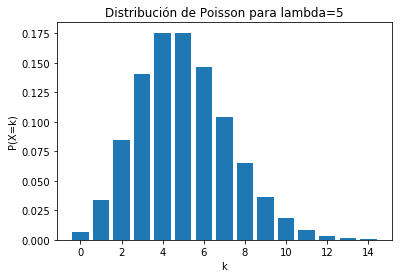

In [7]:
#graficando poisson en python
import matplotlib.pyplot as plt
import scipy.stats as stats

# Definir el parámetro lambda de la distribución de Poisson
lambd = 5

# Crear un objeto de la distribución de Poisson
dist = stats.poisson(lambd)

# Crear una lista de valores de k para graficar
k = range(15)

# Obtener la probabilidad de cada valor de k
prob = [dist.pmf(i) for i in k]

# Crear un gráfico de barras para mostrar la distribución de Poisson
plt.bar(k, prob)
plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.title('Distribución de Poisson para lambda=5')
plt.show()

## Distribucion Normal

La función de distribución de la distribución normal está definida como sigue: 

${\displaystyle {\begin{aligned}\Phi _{\mu ,\sigma ^{2}}(x)&{}=\int _{-\infty }^{x}\varphi _{\mu ,\sigma ^{2}}(u)\,du\\&{}={\frac {1}{\sigma {\sqrt {2\pi }}}}\int _{-\infty }^{x}e^{-{\frac {(u-\mu )^{2}}{2\sigma ^{2}}}}\,du,\quad x\in \mathbb {R} .\\\end{aligned}}}$

donde:

$\mu$ es la media (también puede ser la mediana, la moda o el valor esperado, según aplique)
    
$\sigma$ es la desviación típica
    
$\sigma^2$ es la varianza
    
$\varphi$ representa la función de densidad de probabilidad

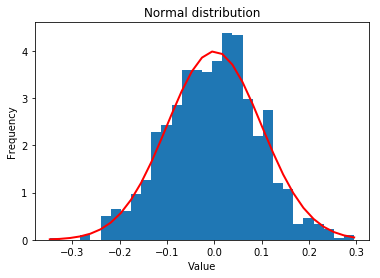

In [8]:
#graficando distribucion normal en python
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
mu, sigma = 0, 0.1 # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)

# Plot the histogram
count, bins, ignored = plt.hist(data, 30, density=True)

# Plot the normal distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal distribution')

# Show the plot
plt.show()

In [9]:
# Create a normal distribution from Tensorflow Distributions
normal=tfd.Normal(loc=0,scale=1)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [10]:
# Sample from the chosen distribution...
normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=-0.6383433>

In [11]:
# ... or sample multiple times
normal.sample(100)

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([-0.25055045, -0.08064709,  0.69627273,  1.601835  ,  1.6900092 ,
        0.43828106, -0.02178756, -0.80817044,  0.31876314,  0.7157107 ,
        1.4445796 , -0.15089487, -1.0427645 , -1.1174989 ,  1.0929604 ,
       -0.39272586, -0.5531866 ,  0.95992935, -1.836093  ,  1.4887183 ,
        1.8107936 ,  1.8437709 , -0.3327268 ,  1.477067  , -0.8985954 ,
        0.96841604,  0.36593893, -1.8755535 , -0.7125852 ,  1.5729628 ,
        1.8036427 ,  0.57912344, -1.1122915 ,  0.9566904 ,  0.3747682 ,
        0.37367332, -0.31089664, -1.3574171 , -1.5137705 , -0.24935898,
        0.8982056 , -0.5717587 ,  0.43727708, -0.37945703,  1.4337502 ,
        1.2216357 , -2.0776887 , -1.4201943 ,  0.24380013, -1.1093296 ,
        0.08061728,  0.14302143,  0.05074061,  0.9794749 ,  0.8256295 ,
        0.43609565, -0.67405427,  0.43498704,  1.2463142 ,  0.79786944,
       -0.14009738, -0.17249063, -1.1507598 , -2.444427  , -0.667763  ,
        1.647966

In [12]:
# Obtain value of probability's density
normal.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989423>

In [13]:
# Obtain value of logprobability
normal.log_prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

In [14]:
# Verify that this really is the log of the probability
if np.log(normal.prob(0)) == normal.log_prob(0):
    print("son iguales")

son iguales


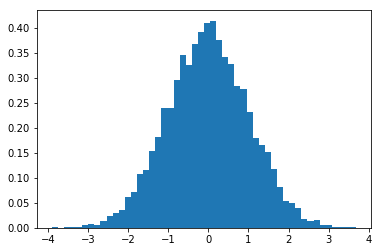

In [15]:
# Plot a histogram, approximating the density

plt.hist(normal.sample(10000), bins=50, density=True)
plt.show()

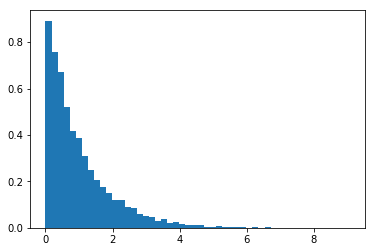

In [16]:
# Do the same for the exponential distribution
exp=tfd.Exponential(rate=1)
plt.hist(exp.sample(10000), bins=50, density=True)
plt.show()

In [17]:
# Sample as before
exp.sample(11)

<tf.Tensor: shape=(11,), dtype=float32, numpy=
array([0.49917367, 2.7285445 , 0.5229746 , 2.1884427 , 2.019749  ,
       0.7911491 , 1.878965  , 0.6141575 , 0.29444578, 0.45559305,
       0.60145825], dtype=float32)>

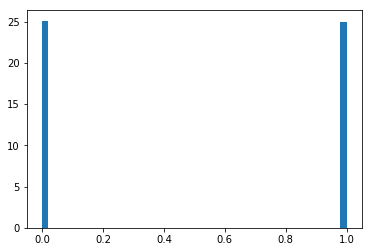

In [24]:
# Create a Bernoulli distribution (discrete)
#bernoulli le pasas una proba y es la proba de elegir un 1 
#por ejemplo aqui del total el 50% son 1 y 50% son 0 
bernoulli=tfd.Bernoulli(probs=0.5)
plt.hist(bernoulli.sample(10000), bins=50, density=True)
plt.show()

In [21]:
bernoulli.sample(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int32)>

#### A word of caution on discrete distributions

In [27]:
# Calculate Bernoulli prob and see that 0.5 and -1 do not give the correct probability!
#la funcion de proba bernoulli solo prodria ser evaluada en 1 o 0 (proba de obtener 1 o 0)
#pero resulta que calcula probabilidades para otros parametros hay que tener cuidado con esto

bernoulli=tfd.Bernoulli(probs=0.8)

for k in [0,0.5,1,-1]:
    print('prob result {} for k = {} '.format(bernoulli.prob(k),k))

prob result 0.19999998807907104 for k = 0 
prob result 0.3999999761581421 for k = 0.5 
prob result 0.800000011920929 for k = 1 
prob result 0.04999999701976776 for k = -1 


In [28]:
# Replicate the scores to see what is occurring under the hood
#para ver por que arroja estos valores en puntos distintos de 0 y 1 veamos como se evalua
#definamos nuestra propia funcion bernoulli
def my_bernoulli(p_success, k):
    return np.power(p_success,k)*np.power((1-p_success),(1-k))

In [29]:
# Evaluate it as before
#evaluemos en los mismos valores y vemos el mismo resultado

for k in [0,0.5,1,-1]:
    print('prob result {} for k = {} '.format(my_bernoulli(p_success=0.8, k=k),k))

prob result 0.19999999999999996 for k = 0 
prob result 0.3999999999999999 for k = 0.5 
prob result 0.8 for k = 1 
prob result 0.049999999999999975 for k = -1 


#### Work with batch distributions

In [35]:
# Create a batched Bernoulli distribution

#notemos que ahora  batch_shape=[5] pues tiene un lote
#podemos crear lotes a partir de pasar vectores o matrices
bernoulli_batch = tfd.Bernoulli(probs=[1, 0.25, 0.5, 0.75, 0])
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [36]:
# Sample from it, noting the shape
#toma 5 vectores donde para cada vector sus elementos se eligen por cada uno de los parametros en el lote
#note que la primera entrada de cada vector es un 1 con 100% de certeza y el ultimo elemento es 1 con 0% de certeza
#por eso todos tienen en la primera entrada un 1 y en la ultima es 0 pues el lote se genero con 
#probs=[1, 0.25, 0.5, 0.75, 0] que en la primera entrada paso pobra=100 y en la ultima proba =0
bernoulli_batch.sample(5)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[1, 0, 1, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 1, 1, 0]], dtype=int32)>

In [53]:
# Use a batch shape with higher rank
#podemos definir distribuciones de dimensiones mas altas como en este caso generamos un lote de  3 distribuciones
#bidimensionales

probs = [[[0, 0], 
          [0.8, 0.3], 
          [1, 1]]]
bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [54]:
# Sample from this batch of distributions
#toma 3 muestras de la misma froma que el lote donde cada par se calcula con la probabilidad dada
#note que en todas las muestras los primeros son 1 con 0% de probabilidad ie 0 pues e generaron con  las
#probabilidades [0, 0]
#y note que los ultimos pares en todas las muestras son 1 con 100% de probabilidad pues se generaron con las
#probabilidades [1, 1] pasadas por el lote

bernoulli_batch_2D.sample(3)

<tf.Tensor: shape=(3, 1, 3, 2), dtype=int32, numpy=
array([[[[0, 0],
         [1, 1],
         [1, 1]]],


       [[[0, 0],
         [1, 1],
         [1, 1]]],


       [[[0, 0],
         [1, 1],
         [1, 1]]]], dtype=int32)>

In [55]:
# Determine probabilities from this batch distribution

bernoulli_batch_2D.prob([[[1, 0], 
                         [0, 0], 
                         [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.        , 1.        ],
        [0.19999999, 0.7       ],
        [1.        , 1.        ]]], dtype=float32)>

***
<a id='multivariate_distributions'></a>
## Multivariate Distributions

Note que los lotes no son multivariadas si tengo densidad de probabilidad $d(x)$ un lote se refiere a formar
$[d(x_1),d(x_2),...,d(x_n)]$ o $[[d(x_1),d(x_2)],[d(x_3),d(x_4)],...,[d(x_{n-1}),d(x_n)]]$ donde las $x_i$ pueden ser todas distintas, todas iguales o variadas, tener distribuciones multivariables significa tener distribuciones de la forma $d(x_1,..,x_n)$ de las que tambien se pueden formar lotes de forma  $[d(x_1,..,x_n),d(x_1,..,x_n),...,d(x_1,..,x_n)]$ o $[[d(x_1,..,x_n),d(x_1,..,x_n)],[d(x_1,..,x_n),d(x_1,..,x_n)],...,[d(x_1,..,x_n),d(x_1,..,x_n)]]$ 

Las funciones de una variable aleatoria tenian $\text{event_shape=} [ ]$ pero las de varias variables aleatorias no 

In [58]:
#definamos distribucion normal de 2 variables
mv_normal=tfd.MultivariateNormalDiag(loc=[-1,0.5],scale_diag=[1.,1.5])
print(mv_normal)
print()

#note que su event_shape=[2] pues tiene 2 variabes
print(mv_normal.event_shape)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[], event_shape=[2], dtype=float32)

(2,)


In [70]:
#como podemos formar lotes de univariables notemos algo:

#definiendo normal de 2 variables
mv_normal=tfd.MultivariateNormalDiag(loc=[-1,0.5],scale_diag=[1.,1.5])
#note que batch_shape=[] pues no es un lote y event_shape=[2] pues tiene 2 variables
print(mv_normal)
print()
#tomando una muestra de 3 normales de 2 variables
print(mv_normal.sample(3))
print()
#note que la forma de un lote de 3 distribuciones de 2 variables es (3,2)
print(mv_normal.sample(3).shape)
print()

#si fromamos un lote de normal univariable
batch_normal=tfd.Normal(loc=[-1,0.5],scale=[1.,1.5])
#note que batch_shape=[2] pues es un lote y event_shape=[] pues tiene 1 sola variables
print(batch_normal)
print()

#tomando una muestra de 3 lotes de normales de 1 variables
print(batch_normal.sample(3))
print()
#note que la forma de una muestra de un lote de distribuciones de 1 variables es (3,2)
print(batch_normal.sample(3).shape)
print()

#pareciera que los resultados son muy similares por su forma pero debemos tener en cuenta en que
#el primero es una distribucion de dos variables d(x,y) y por eso event_shape=[2] 
#se tomo muestra [d(x,y),d(x,y),d(x,y)]
#el segundo viene de un lote de una distribucion de una variable [d(x),d(x)] y por eso batch_shape=[2]
# al tomar muestra queda [(d(x),d(x)),(d(x),d(x)),(d(x),d(x))] por eso se ven similares

#al parecer fuera de esta aclaracion no hay diferencia entre las salidas obtenida pero la diferencia se 
#hace clara al calcular los logaritmos de las probabilidades

#logaritmo de las probabilidades para multivariable
#devueleve un solo valor
print(mv_normal.log_prob([-0.2,1.8]))
print()

#logaritmo de las probabilidades para lote de univariable
#devuelve 2 valores 
print(batch_normal.log_prob([-0.2,1.8]))
print()

#formando lote de multivariable
# note que batch_shape=[3], event_shape=[2] lote de 3 distribuciones de 2 variables 
batch_mv_normal=tfd.MultivariateNormalDiag(loc=[[-1,0.5],[2,0],[-0.5,1.5]],
                                           scale_diag=[[1.,1.5],[2.,0.5],[1.,1.]])
print(batch_mv_normal)
print()

#tomemos 2 muestras
print(batch_mv_normal.sample(2))
print()

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[], event_shape=[2], dtype=float32)

tf.Tensor(
[[-0.01006514 -0.01662219]
 [-1.9879004   1.1989071 ]
 [-2.040532    1.0975325 ]], shape=(3, 2), dtype=float32)

(3, 2)

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)

tf.Tensor(
[[-1.568731   -0.30880523]
 [ 0.00496817  3.853023  ]
 [ 0.17084765  1.6488059 ]], shape=(3, 2), dtype=float32)

(3, 2)

tf.Tensor(-2.9388978, shape=(), dtype=float32)

tf.Tensor([-1.2389386 -1.699959 ], shape=(2,), dtype=float32)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[3], event_shape=[2], dtype=float32)

tf.Tensor(
[[[-1.0068641  -0.5231354 ]
  [ 0.7184218   0.05949617]
  [-1.6471995   1.942647  ]]

 [[ 0.11087871  0.68736273]
  [ 1.6820512  -0.33454445]
  [ 1.3806053   2.4203508 ]]], shape=(2, 3, 2), dtype=float32)



#### Basic multivariate distributions

In [74]:
# Define 2D multivariate Gaussian with diagonal covariance matrix
mv_normal=tfd.MultivariateNormalDiag(loc=[0,1],scale_diag=[1,20])
print(mv_normal)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[], event_shape=[2], dtype=float32)


In [75]:
# Sample from it
print(mv_normal.sample(10))

tf.Tensor(
[[ -1.1036117   -0.84957135]
 [  0.11429915 -16.222656  ]
 [  1.8086982   -4.8331156 ]
 [ -0.05304217   3.3823059 ]
 [ -0.09071641   9.89209   ]
 [  0.8508635    8.467824  ]
 [ -0.8383965   18.23705   ]
 [  1.7177683   -7.143317  ]
 [ -0.7794515   27.612053  ]
 [  0.70160615   6.296257  ]], shape=(10, 2), dtype=float32)


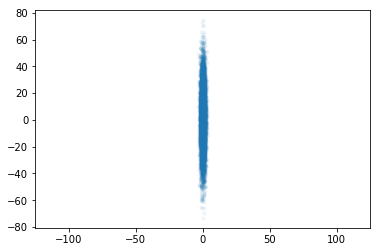

In [76]:
# Make a plot

plt_sample = mv_normal.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

#### Batches of multivariate distributions

In [77]:
# Create three "batches" of multivariate normals 
#scale_diag=[[1,2],[2,1],[2,2]] corresponde a valores en la diaginal de matrix de covarianza
#cov[x,y]
batch_mv_normal=tfd.MultivariateNormalDiag(loc=[[0,0],[0,0],[0,0]],scale_diag=[[1,2],[2,1],[2,2]])
print(batch_mv_normal)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[3], event_shape=[2], dtype=float32)


In [78]:
# Sample from it
sample=batch_mv_normal.sample(5)
print(sample)

tf.Tensor(
[[[-0.94565284  0.819566  ]
  [ 0.03853304  0.5514057 ]
  [ 1.7180313  -2.8263128 ]]

 [[-1.5741836   0.42347184]
  [ 3.992094   -1.2332556 ]
  [ 2.1400907  -4.1518416 ]]

 [[ 0.32172462 -1.9466182 ]
  [ 2.8355572  -0.24831234]
  [-1.5446435  -5.267481  ]]

 [[ 0.5506131   1.8870534 ]
  [ 2.7252142  -0.5228341 ]
  [ 3.325838   -0.49502715]]

 [[ 0.33315244  1.4359127 ]
  [-1.9689782   0.25765008]
  [-0.04513794  1.249907  ]]], shape=(5, 3, 2), dtype=float32)


In [82]:
# Compute log probs
batch_mv_normal.log_prob(sample)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-3.0621147, -2.683234 , -4.591631 ],
       [-3.7924674, -5.283586 , -5.9513936],
       [-3.056443 , -3.5669017, -6.990706 ],
       [-3.1277328, -3.5960512, -4.637453 ],
       [-2.8442502, -3.0488253, -3.4197094]], dtype=float32)>

In [83]:
# Create a sample for a plot -- notice the shape
plt_sample_batch=batch_mv_normal.sample(10000)
plt_sample_batch.shape

TensorShape([10000, 3, 2])

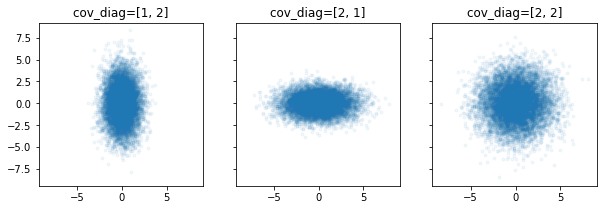

In [84]:
# Plot samples from the batched multivariate Gaussian

fig, axs = (plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3)))
titles = ['cov_diag=[1, 2]','cov_diag=[2, 1]', 'cov_diag=[2, 2]']

for i, (ax, title) in enumerate(zip(axs,titles)):
    samples = plt_sample_batch[:,i,:] #take the ith batch [samples x event_shape]
    ax.scatter(samples[:, 0], samples[:, 1], marker='.', alpha=0.05)
    ax.set_title(title)
plt.show()



***
<a id='the_independent_distribution'></a>
## The Independent Distribution
Nos ayuda a reinterpretar lotes de distribuciones, permitiendo que dimensiones de los lotes sean pasadas al espacio de eventos, es decir mover dimensiones $\text{batch_shape=}[]$ a $\text{event_shape=}[]$ interpretando lotes de distribuciones como multivariables

In [91]:
#regresemos al ejemplo donde producimos dos resultado similares uno usando lotes de distribuciones de una variable
#y otro usando muestreo de distribuciones multivariables

#1 distribucion de 2 variables
mv_normal=tfd.MultivariateNormalDiag(loc=[-1,0.5],scale_diag=[1.,1.5])
print(mv_normal)
print()
#la log_prob da 1 numero
print(mv_normal.log_prob([-0.2,1.8]))
print()


#lote de 2 distribuciones de una variable 1 que conjunta la de las 2 variables
batch_normal=tfd.Normal(loc=[-1,0.5],scale=[1.,1.5])
print(batch_normal)
print()
#la log_prob da 2 numeros (1 para cada lote)
print(batch_normal.log_prob([-0.2,1.8]))
print()

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[], event_shape=[2], dtype=float32)

tf.Tensor(-2.9388978, shape=(), dtype=float32)

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)

tf.Tensor([-1.2389386 -1.699959 ], shape=(2,), dtype=float32)



In [95]:
#la distribucion independiente permite reinterpretar el lote de univariables

#le pasamos el lote de 2 distribuciones de 1 variable y le en reinterpreted_batch_ndims el numero de dimensiones del lote
#que seran absorbidas por el even_shape=[] (espacio de eventos) note que event_shape=[2]
#asi a partir de un lote de 2 distribuciones univariable se obtiene una multivariable
#pasamos reinterpreted_batch_ndims=1 pues solo hay una dimension de lote que vale 2
independent_normal=tfd.Independent(batch_normal,reinterpreted_batch_ndims=1)
independent_normal

#si calculamos log_prob
print(independent_normal.log_prob([-0.2,1.8]))
print()


tf.Tensor(-2.9388976, shape=(), dtype=float32)



In [104]:
#veamos que sucede si la dimension de lote es distinta
#note el cambio en batch_shape=[] y event_shape=[]

#es un lote de 3 distribuciones de froma [d(x_1),d(x_2)]
batch_normal=tfd.Normal(loc=[[-1,0.5],[0.,1.],[0.3,-0.1]],scale=[[1.,1.5],[0.2,0.8],[2.,1.]])
#notemos que ahora batch_shape=[3, 2] ya no es un solo numero
print(batch_normal)
print()
print(batch_normal.sample(1))
print()
print('log prob:')
print(batch_normal.log_prob([1,1]))
print()

#ahora obtenemo 3 lotes de distribuciones multivariables [d(x,y)]
independent_normal=tfd.Independent(batch_normal,reinterpreted_batch_ndims=1)
print(independent_normal)
print()
print(independent_normal.sample(1))
print()
print('log prob:')
print(independent_normal.log_prob([1,1]))
print()

tfp.distributions.Normal("Normal", batch_shape=[3, 2], event_shape=[], dtype=float32)

tf.Tensor(
[[[-1.4897028   2.0508084 ]
  [-0.1017995   1.4615598 ]
  [-0.01030499  0.65517116]]], shape=(1, 3, 2), dtype=float32)

log prob:
tf.Tensor(
[[ -2.9189386  -1.3799592]
 [-11.809501   -0.695795 ]
 [ -1.6733357  -1.5239385]], shape=(3, 2), dtype=float32)

tfp.distributions.Independent("IndependentNormal", batch_shape=[3], event_shape=[2], dtype=float32)

tf.Tensor(
[[[-0.5427593   5.3365526 ]
  [ 0.18259586  1.6772817 ]
  [-1.2081323  -1.0808856 ]]], shape=(1, 3, 2), dtype=float32)

log prob:
tf.Tensor([ -4.2988977 -12.505296   -3.1972742], shape=(3,), dtype=float32)



In [107]:
# Start by defining a batch of two univariate Gaussians, then
# combine them into a bivariate Gaussian with independent components

#lote de dos distribuciones univaluadas
locs=[-1.,1.]
scales=[0.5,1.]
batch_of_normals=tfd.Normal(loc=locs,scale=scales)

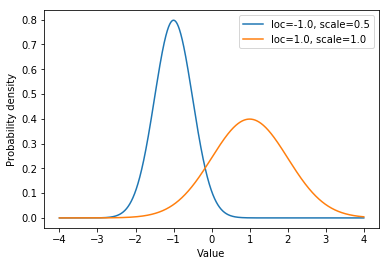

In [108]:
# Univariate density functions
#visualizando cada distribucion
import seaborn as sns

t = np.linspace(-4, 4, 10000)
densities = batch_of_normals.prob(np.repeat(t[:, np.newaxis], 2, axis=1)) # each column is a vector of densities for one distn

sns.lineplot(t, densities[:, 0], label='loc={}, scale={}'.format(locs[0], scales[0]))
sns.lineplot(t, densities[:, 1], label='loc={}, scale={}'.format(locs[1], scales[1]))
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend()
plt.show()

In [109]:
# Check their batch_shape and event_shape
batch_of_normals

<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [111]:
# Use Independent to convert the batch shape to the event shape
#convertimos el lote en multivariable
bivariate_normal_from_Independent=tfd.Independent(batch_of_normals,reinterpreted_batch_ndims=1)

In [113]:
# Note that dimension from batch_shape has shifted to event_shape
bivariate_normal_from_Independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

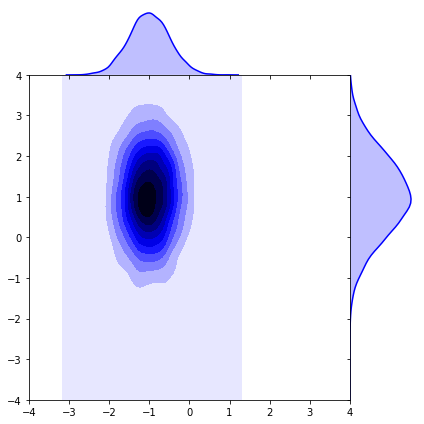

In [114]:
# Create a plot showing joint density contours and marginal density functions
#visualizando multivariable

samples = bivariate_normal_from_Independent.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

In [116]:
# Use MultivariateNormalDiag to create the equivalent distribution
# Note that diagonal covariance matrix => no correlation => independence (for the multivariate normal distribution)
bivariate_normal_from_Multivariate=tfd.MultivariateNormalDiag(loc=locs,scale_diag=scales)
bivariate_normal_from_Multivariate

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

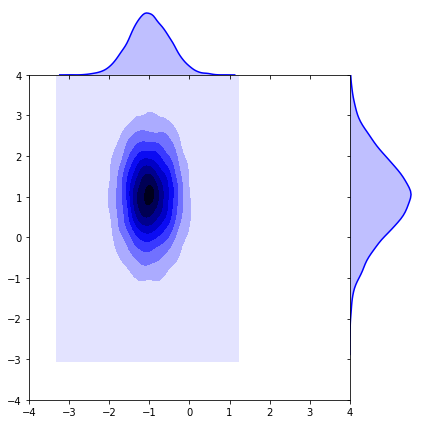

In [117]:
# Plot the joint density function of bivariate_normal_from_Independent
# Refer back to bivariate_normal_from_Independent to show that the plot is the same
# Summarise how Independent has been used

samples = bivariate_normal_from_Multivariate.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

#### Shifting batch dimensions to event dimensions using 
`reinterpreted_batch_ndims`

In [118]:
# Demonstrate use of reinterpreted_batch_ndims
# By default all batch dims except the first are transferred to event dims

loc_grid = [[-100., -100.],
            [100., 100.],
            [0., 0.]]
scale_grid = [[1., 10.],
              [1., 10.],
              [1., 1.]]

normals_batch_3by2_event_1 = tfd.Normal(loc=loc_grid, scale=scale_grid)

In [119]:
# Highlight batch_shape

normals_batch_3by2_event_1

<tfp.distributions.Normal 'Normal' batch_shape=[3, 2] event_shape=[] dtype=float32>

In [120]:
# We now have a batch of 3 bivariate normal distributions,
# each parametrised by a column of our original parameter grid

#si no le pasamos reinterpreted_batch_ndims toma la ultima de derecha a izq ->
normals_batch_3_event_2=tfd.Independent(normals_batch_3by2_event_1)
normals_batch_3_event_2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[3] event_shape=[2] dtype=float32>

In [121]:
# Evaluate log_prob
normals_batch_3_event_2.log_prob([[-10,10],[100,100],[1,1]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-4.1146406e+03, -4.1404624e+00, -2.8378770e+00], dtype=float32)>

In [122]:
# Can reinterpret _all_ batch dimensions as event dimensions
normals_batch_1_event_3by2=tfd.Independent(normals_batch_3by2_event_1,reinterpreted_batch_ndims=2)
normals_batch_1_event_3by2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[3, 2] dtype=float32>

In [123]:
# Take log_probs 
normals_batch_1_event_3by2.log_prob([[-10,10],[100,100],[1,1]])

<tf.Tensor: shape=(), dtype=float32, numpy=-4121.619>

#### Using `Independent` to build a Naive Bayes classifier

#### Introduction to `newsgroups` data set

In this tutorial, just load the dataset, fetch train/test splits, probably choose a subset of the data.

Construct the class conditional feature distribution (with Independent, using the Naive Bayes assumption) and sample from it.

We can just use the ML estimates for parameters, this topic are described later.

In [135]:
# Convenience function for retrieving the 20 newsgroups data set

# Usenet was a forerunner to modern internet forums
# Users could post and read articles
# Newsgroup corresponded to a topic
# Example topics in this data set: IBM computer hardware, baseball
# Our objective is to use an article's contents to predict its newsgroup,
# a 20-class classification problem.

# 18000 newsgroups, posts on 20 topics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer


In [136]:
# Get the train data
#contiene articulos clasificados por temas
newsgroups_data=fetch_20newsgroups(data_home='20_Newsgroup_Data/',subset='train')

In [137]:
# More information about the data set
print(newsgroups_data['DESCR'])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [138]:
# Example article
print(newsgroups_data['data'][0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [139]:
# Associated label
print(newsgroups_data['target'][0])


7


In [140]:
# Name of label
print(newsgroups_data['target_names'][7])

rec.autos


In [141]:
# Preprocessing boilerplate

n_documents = len(newsgroups_data['data'])

count_vectorizer = CountVectorizer(input='content', binary=True,
                                   max_df=0.25, min_df=1.01/n_documents) # ignore common words, words that appear once
binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_data['data']) # input is a list of strings


In [142]:
# Check shape
binary_bag_of_words.shape

(11314, 56365)

In [143]:
# Check that the fit has been successful
count_vectorizer.inverse_transform(binary_bag_of_words[0,:])

[array(['lerxst', 'wam', 'umd', 'where', 'thing', 'car', 'rac3',
        'maryland', 'college', 'park', '15', 'wondering', 'anyone',
        'could', 'enlighten', 'saw', 'day', 'door', 'sports', 'looked',
        'late', '60s', 'early', '70s', 'called', 'bricklin', 'doors',
        'were', 'really', 'small', 'addition', 'front', 'bumper',
        'separate', 'rest', 'body', 'tellme', 'model', 'name', 'engine',
        'specs', 'years', 'production', 'made', 'history', 'whatever',
        'info', 'funky', 'looking', 'please', 'mail', 'thanks', 'il',
        'brought', 'neighborhood'], dtype='<U80')]

In [144]:
# Dict that will be useful later 

inv_vocabulary = {value:key for key, value in count_vectorizer.vocabulary_.items()}

#### A Naive Bayes classifier for `newsgroup`

Each feature vector $x$ is a list of indicators for whether a word appears in the article. $x_i$ is 1 if the $i$th word appears, and 0 otherwise. `inv_vocabulary` matches word indices $i$ to words.

Each label $y$ is a value in $0, 1, \ldots, 19$.

The parts of a naive Bayes classifier for this problem can be summarised as:  


- A probability distribution for the feature vector by class, $p(x|y = j)$ for each $j = 0, 1, \ldots, 19$. These probability distributions are assumed to have independent components: we can factorize the joint probability as a product of marginal probabilities
\begin{equation}
    p(x|y = j) = \prod_{i=1}^d p(x_i|y = j)
\end{equation}
These marginal probability distributions are Bernoulli distributions, each of which has a single parameter $\theta_{ji} := p(x_i = 1|y = j)$. This parameter is the probability of observing word $i$ in an article of class $j$. 

- We will use the Laplace smoothed maximum likelihood estimate to compute these parameters. Laplace smoothing involves adding small counts to every feature for each class. Else, if a feature did not appear in the training set of a class, but then we observed it in our test data the log probability would be undefined.

- A collection of class prior probabilities $p(y = j)$. These will be set by computing the class base rates in the training set.  


- A function for computing the probability of class membership via Bayes' theorem:  

\begin{equation}
    p(y = j|x) = \frac{p(x|y = j)p(y = j)}{p(x)}
\end{equation}

In [157]:
# Compute the parameter estimates (adjusted fraction of documents in class that contain word)

n_classes = newsgroups_data['target'].max() + 1
y = newsgroups_data['target']
n_words = binary_bag_of_words.shape[1]


alpha =1e-6 # parameters for Laplace smoothing

theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
for c_k in range(n_classes): # 0, 1, ..., 19
    class_mask = (y == c_k)
    N = class_mask.sum() # number of articles in class
    theta[c_k, :] = (binary_bag_of_words[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

In [158]:
# Check whether the most probable word in each class is reasonable

most_probable_word_ix = theta.argmax(axis=1) # most probable word for each class

for j, ix in enumerate(most_probable_word_ix):
    print('Most probable word in class {} is "{}".'.format(newsgroups_data['target_names'][j],
                                                           inv_vocabulary[ix]))

Most probable word in class alt.atheism is "people".
Most probable word in class comp.graphics is "graphics".
Most probable word in class comp.os.ms-windows.misc is "windows".
Most probable word in class comp.sys.ibm.pc.hardware is "thanks".
Most probable word in class comp.sys.mac.hardware is "mac".
Most probable word in class comp.windows.x is "window".
Most probable word in class misc.forsale is "sale".
Most probable word in class rec.autos is "car".
Most probable word in class rec.motorcycles is "dod".
Most probable word in class rec.sport.baseball is "he".
Most probable word in class rec.sport.hockey is "ca".
Most probable word in class sci.crypt is "clipper".
Most probable word in class sci.electronics is "use".
Most probable word in class sci.med is "reply".
Most probable word in class sci.space is "space".
Most probable word in class soc.religion.christian is "god".
Most probable word in class talk.politics.guns is "people".
Most probable word in class talk.politics.mideast is 

In [159]:
# Define a distribution for each class
batch_of_bernoullis=tfd.Bernoulli(probs=theta)
p_x_given_y=tfd.Independent(batch_of_bernoullis,reinterpreted_batch_ndims=1)
p_x_given_y

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[20] event_shape=[56365] dtype=int32>

In [160]:
# Take a sample of words from each class

n_samples = 10
sample=p_x_given_y.sample(n_samples)
sample.shape

TensorShape([10, 20, 56365])

In [161]:
# Choose a class

#clase que tiene que ver con la religuom
chosen_class = 15
newsgroups_data['target_names'][chosen_class]

'soc.religion.christian'

In [162]:
# Indicators for words that appear in the sample
#vemos su codifcicaion para esa clase
class_sample = sample[:, chosen_class, :]
class_sample

<tf.Tensor: shape=(10, 56365), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>

In [165]:
# Perform inverse transform to test quality of fit

#vemos las palabras que se relacionan con esa clase segun nuestro predictor
count_vectorizer.inverse_transform(class_sample)

[array(['01', '1993', '7th', '99', 'absolutist', 'accepted', 'acknowledge',
        'acs', 'acts', 'again', 'arguments', 'assumptions', 'bc', 'become',
        'behaviour', 'being', 'bible', 'big', 'biting', 'brother', 'bunny',
        'called', 'case', 'cases', 'changed', 'children', 'close',
        'coming', 'common', 'confirmation', 'conflict', 'considering',
        'correctly', 'cs89mcd', 'different', 'distruction', 'dmn', 'does',
        'doing', 'drove', 'emphasis', 'empty', 'events', 'ever', 'every',
        'evidence', 'evil', 'facie', 'fact', 'fasting', 'figures',
        'finished', 'follow', 'follows', 'fro', 'fruits', 'gender', 'god',
        'going', 'got', 'gradual', 'graduate', 'ground', 'group', 'harold',
        'her', 'human', 'imposing', 'inappropriate', 'internet', 'into',
        'irresponsible', 'jesus', 'joe', 'kellett', 'lead', 'left', 'let',
        'limitations', 'll', 'looking', 'love', 'made', 'many', 'math',
        'message', 'michael', 'mike', 'moral', 

***
<a id='sampling_and_log_probs'></a>
## Sampling and log probs

Podemos aplicar broadcasting a los metodos prob y log_prob

In [166]:
# Make Multivariate Distribution

normal_distributions = tfd.MultivariateNormalDiag(loc=[[0.5, 1], [0.1, 0], [0, 0.2]],
                                 scale_diag=[[2, 3], [1, 3], [4, 4]])
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [167]:
# Sample
normal_distributions.sample(5)

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[ 1.45207   , -1.2671385 ],
        [-0.9819329 , -0.9435795 ],
        [ 1.089914  , -3.0450065 ]],

       [[ 0.3961581 , -1.9614446 ],
        [-0.77693784, -6.395932  ],
        [ 4.980682  , -0.5278261 ]],

       [[ 3.30444   , -0.24556243],
        [ 1.0200157 ,  5.62127   ],
        [ 5.0966425 ,  0.32323232]],

       [[ 0.7609292 ,  3.9422667 ],
        [-0.47178283,  3.515521  ],
        [ 1.52714   ,  4.9016037 ]],

       [[ 0.13088343, -2.8836408 ],
        [-1.1440197 , -2.5603771 ],
        [-4.7815933 , -0.98972267]]], dtype=float32)>

In [168]:
# Multivariate Normal batched Distribution
# We are broadcasting batch shapes of `loc` and `scal_diag` 
# against each other

loc = [[[0.3, 1.5, 1.], [0.2, 0.4, 2.8]],
        [[2., 2.3, 8], [1.4, 1, 1.3]]]
scale_diag = [0.4, 1., 0.7]
normal_distributions = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2, 2] event_shape=[3] dtype=float32>

In [169]:
# Use independent to move part of the batch shape

ind_normal_distributions=tfd.Independent(normal_distributions,reinterpreted_batch_ndims=1)
ind_normal_distributions

<tfp.distributions.Independent 'IndependentMultivariateNormalDiag' batch_shape=[2] event_shape=[2, 3] dtype=float32>

In [172]:
# Draw some samples
samples=ind_normal_distributions.sample(5)
samples.shape
#note que tenemos [muestra_shape=5,batch_shape=2,event_shape=(2, 3)]=[S,B,E]=[5, 2, 2, 3]

TensorShape([5, 2, 2, 3])

In [173]:
# [B, E]=[2,2,3] shaped input
inp=tf.random.uniform((2,2,3))
ind_normal_distributions.log_prob(inp)
#la dimension resultante es la de lote B=2  shape=(2,)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ -7.832224, -82.35718 ], dtype=float32)>

In [174]:
# [E] shaped input (broadcasting over batch size)
#veamos como funciona broadcasting sobre lote si solo pasamos entrada de dim E=(2,3)
inp=tf.random.uniform((2,3))
ind_normal_distributions.log_prob(inp)

#el resultado sige teniendo shape=(2,)= tamaño de lote

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-11.281106, -65.40057 ], dtype=float32)>

In [175]:
#[S, B, E] shaped input (broadcasting over samples)
#veamos como funciona broadcasting si pasamos forma [S, B, E] con S=9 
inp=tf.random.uniform((9,2,2,3))
ind_normal_distributions.log_prob(inp)

#el resultado tien shape=(9,2) hace broadcasting sobre tamaño de muestra 9 * tamaño de lote =2

<tf.Tensor: shape=(9, 2), dtype=float32, numpy=
array([[-11.847362, -78.15491 ],
       [ -9.265546, -74.806854],
       [-10.124989, -74.00938 ],
       [ -8.423023, -70.409096],
       [ -9.959869, -70.63531 ],
       [ -8.39356 , -70.727036],
       [-11.425817, -81.818855],
       [-12.695864, -62.425606],
       [ -8.190274, -70.59572 ]], dtype=float32)>

In [176]:
# `[S, b, e]` shaped input, where [b, e] is broadcastable over [B, E]

inp=tf.random.uniform((5,1,2,1))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ -9.969991, -80.47369 ],
       [-11.114958, -68.2763  ],
       [ -9.934106, -58.039017],
       [ -9.212123, -71.79583 ],
       [-10.124066, -74.50814 ]], dtype=float32)>

#### Naive Bayes example

Lets now use what we have learned and continue the Naive Bayes classifier we were building last tutorial.

In [177]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [178]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):
    
    newsgroups_train_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                               subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                              subset='test', categories=categories)

    n_documents = len(newsgroups_train_data['data'])
    count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents)
    
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data'])
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data']) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']),  (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])

In [179]:
# Defining a function to conduct Laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1 # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

    return theta

In [180]:
# Getting a subset of the 20 newsgroup dataset

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories=categories)
smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories))

To now make our NB classifier we need to build three functions:
* Compute the class priors
* Build our class conditional distributions
* Put it all together and classify our data

In [181]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [182]:
# Run the function 
priors=class_priors(n_classes=len(categories), labels=train_labels)


The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [183]:
# Now we will do a function that given the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.
def make_distribution(probs):
    batch_of_bernoullis=tfd.Bernoulli(probs=probs)
    dist=tfd.Independent(batch_of_bernoullis,reinterpreted_batch_ndims=1)
    return dist
tf_dist=make_distribution(smoothed_counts)
tf_dist

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[4] event_shape=[17495] dtype=int32>

In [184]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist,sample,priors):
    cond_probs=dist.log_prob(sample)
    joint_likelihood=tf.add(np.log(priors), cond_probs)
    norm_factor=tf.math.reduce_logsumexp(joint_likelihood,axis=-1,keepdims=True)
    log_prob=joint_likelihood-norm_factor
    return log_prob

#### Computing log_probs

In [185]:
# Predicting one example from our test data
log_prob=predict_sample(tf_dist,test_data[0],priors)
log_prob


<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([-6.1736160e+01, -1.5258789e-05, -1.1619934e+01, -6.3327240e+01],
      dtype=float32)>

In [ ]:
# Loop over our test data and classify.

probabilities = []
for sample, label in zip(test_data, test_labels):
    probabilities.append(tf.exp(predict_sample(tf_dist, sample, priors)))

probabilities = np.asarray(probabilities)
predicted_classes = np.argmax(probabilities, axis =-1)
print('f1 ', f1_score(test_labels, predicted_classes, average='macro'))

In [ ]:
# Make a Bernoulli Naive Bayes classifier using sklearn with the same level of alpha smoothing. 

clf = BernoulliNB(alpha=1)
clf.fit(train_data, train_labels)
pred = clf.predict(test_data)
print('f1 from sklean ', f1_score(test_labels, pred, average='macro'))

***
<a id='trainable_distributions'></a>
## Trainable Distributions

Podmemos hacer que los parametros de un objeto distribucion sean entrenables para poder ser aprendidos de datos lo cual nos da una relacion entre distribuciones y ML

En los modelos probabilisticos de ML al entrenar se trabaja bajo el paradigma de maximize likelihood es decir encontrar los parametros del modelo que maximizen la probabilidad o distribucion("likelihood") de nuestros datos.

Maximizar la proba se puede hacer minimizando el negativo del logaritmo de la probabilidad "negative log likelihood (nll)" que para un problema de clasificacion binario esta dada por:

$\displaystyle -\log[\mathbb{P}(D|\theta)]=-\sum\limits_{i=1}^n y_i\log(\hat{y}_{\theta,i})+(1-y_i)\log(1-\hat{y}_{\theta,i})$

donde:
 
 $\hat{y}_{\theta,i}$ es la probabilidad predicha  de que el i-esimo dato sea positivo
 
 $1-\hat{y}_{\theta,i}$ es la probabilidad predicha  de que el i-esimo dato sea negativo


In [ ]:
#supongamos que tenemos una distribucion normal d(media,desviacionestanar) y queremos hacer que la media
#sea una variable iniciada en 0 que se aprenda de los datos 
normal_media_entrenable=tfd.Normal(loc=tf.Variable(0.,name'loc'),scale=1.)

#podemos ver que valores son entrenables mediante 
normal_media_entrenable.trainable_variables

#suponiendo que tenemos datos IID (independientes e identicamente distribuidos) 
#de esta forma la log_prob de los datos es la suma de las log_prob en cada dato
#o para nuestros fines el promedio de las log_prob en cada dato lo cual no cambia el minimo a alcanzar

#definimos nuestra funcion likelihood a minimizar
#x_train=[x1,..,xn]
def nll(x_train):
    #calcula vector del 
    #normal_media_entrenable.log_prob(x_train)=[log(p(x1)),...log(p(xn))]
    #-tf.reduce_mean(normal_media_entrenable.log_prob(x_train)) = -1/n(log(p(x1))+...+log(p(xn)))
    return -tf.reduce_mean(normal_media_entrenable.log_prob(x_train))

#definimos calculo de perdida y gradientes de nuestra funcion a optimizar
@tf.function #para que se genere la grafia automaticamente
def get_loss_and_grad(x_train):
    with tf.GradientTape() as tape:
        tape.watch(normal_media_entrenable.trainable_variables)
        loss=nll(x_train)
    grads=tape.gradient(loss,normal_media_entrenable.trainable_variables)
    return loss, grads

#Instanciamos el optimizador 
optimizer=tf.keras.optimizers.SGD(learning_rate=0.05)

#definimos ciclo sencillo de entrenamiento
for _ in range(num_steps):
       #calculamos perdida y gradientes
    loss,grads=get_loss_and_grads(x_samples)
    #aplicamos el optimizador y se actualizan las variables aprendibles	
    optimizer.apply_gradients(zip(grads,normal_media_entrenable.trainable_variable))

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [3]:
# Define an exponential distribution
exponential=tfd.Exponential(rate=0.3,name='exp')


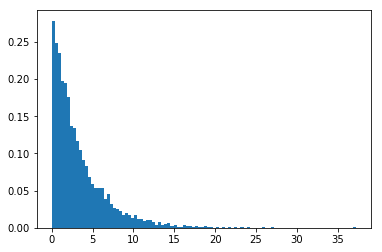

In [6]:
# Plot

plt.hist(exponential.sample(5000), bins=100, density=True)
plt.show()

In [14]:
# Define an exponential distribution with a trainable rate parameter
exp_train=tfd.Exponential(rate=tf.Variable(1.,name='rate'),name='exp_train')
exp_train.trainable_variables


(<tf.Variable 'rate:0' shape=() dtype=float32, numpy=1.0>,)

In [15]:
# Define the negative log likelihood
def nll(x_train,distribution):
    return -tf.reduce_mean(distribution.log_prob(x_train))

In [16]:
# Define a function to compute the loss and gradients
@tf.function #para que se genere la grafia automaticamente
def get_loss_and_grad(x_train,distribution):
    with tf.GradientTape() as tape:
        tape.watch(distribution.trainable_variables)
        loss=nll(x_train,distribution)
    grads=tape.gradient(loss,distribution.trainable_variables)
    return loss, grads


In [21]:
# Optimize

def exponential_dist_optimisation(data, distribution):

    # Keep results for plotting
    train_loss_results = []
    train_rate_results = []
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)

    num_steps = 10

    for i in range(num_steps):
        loss,grads=get_loss_and_grad(data,distribution)
        optimizer.apply_gradients(zip(grads,distribution.trainable_variables))
        #para ver como evoluciona el radio aprendido
        rate_value=distribution.rate.value()
        train_loss_results.append(loss)
        train_rate_results.append(rate_value)
        print("Step {:03d}: Loss: {:.3f}: Rate: {:.3f}".format(i,loss,rate_value))
        
    return train_loss_results, train_rate_results

In [22]:
# Get some data and train
sample_data=exponential.sample(5000)#tomamos datos que vienen de exponencial con rate=0.3
train_loss_results, train_rate_results=exponential_dist_optimisation(data=sample_data, distribution=exp_train)

Step 000: Loss: 3.300: Rate: 0.885
Step 001: Loss: 3.043: Rate: 0.776
Step 002: Loss: 2.815: Rate: 0.676
Step 003: Loss: 2.622: Rate: 0.585
Step 004: Loss: 2.466: Rate: 0.505
Step 005: Loss: 2.350: Rate: 0.439
Step 006: Loss: 2.272: Rate: 0.388
Step 007: Loss: 2.227: Rate: 0.352
Step 008: Loss: 2.206: Rate: 0.329
Step 009: Loss: 2.197: Rate: 0.316


In [23]:
# Predicted value for the rate parameter

pred_value = exp_train.rate.numpy()
exact_value = exponential.rate.numpy()

print("Exact rate: ", exact_value)
print("Pred rate:  ", pred_value)

Exact rate:  0.3
Pred rate:   0.3159696


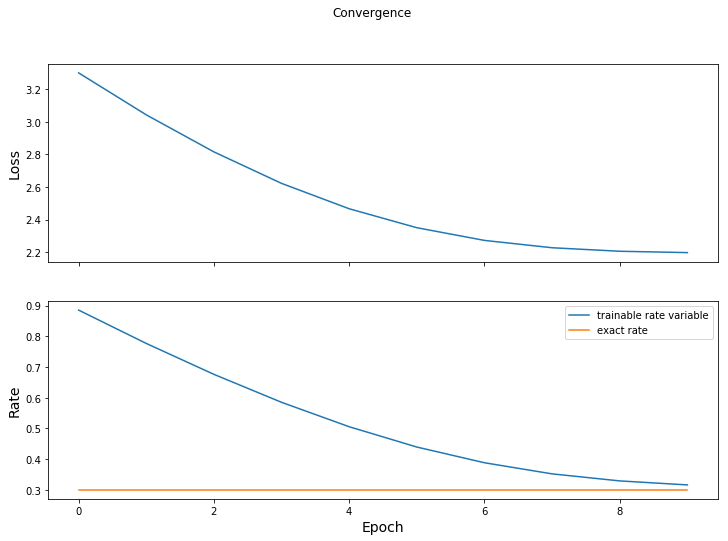

In [24]:
# Plot to see the convergence of the estimated and true parameters

tensor_exact_value = tf.constant(exact_value, shape=[len(train_rate_results)])

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Convergence')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Rate", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_rate_results, label='trainable rate variable')
axes[1].plot(tensor_exact_value, label='exact rate')
axes[1].legend()
plt.show()

In [25]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):

    newsgroups_train_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                               subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                              subset='test', categories=categories)

    n_documents = len(newsgroups_train_data['data'])
    count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents) 
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data']) 
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data']) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']),  (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])


In [26]:
# Defining a function to conduct laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1 # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

    return theta

In [27]:
# Now we will do a function that given the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.

def make_distributions(probs):
    batch_of_bernoullis = tfd.Bernoulli(probs=probs) # shape (n_classes, n_words)
    dist = tfd.Independent(batch_of_bernoullis, reinterpreted_batch_ndims=1)
    return dist

In [28]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [29]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist, sample, priors):
    cond_probs = dist.log_prob(sample)
    joint_likelihood = tf.add(np.log(priors), cond_probs)
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood, axis=-1, keepdims=True)
    log_prob = joint_likelihood - norm_factor

    return log_prob

In [35]:
# Now we learn the distribution using gradient tape

def make_distribution_withGT(data, labels, nb_classes):

    class_data = []
    train_vars = []
    distributions = []
    for c in range(nb_classes):
        train_vars.append(tf.Variable(initial_value=np.random.uniform(low=0.01, high =0.1, size=data.shape[-1])))
        distributions.append(tfd.Bernoulli(probs=train_vars[c]))
        class_mask = (labels == c)
        class_data.append(data[class_mask, :])

    for c_num in range(0,nb_classes):
        optimizer = tf.keras.optimizers.Adam()
        print('\n%-------------------%')
        print('Class ', c_num)
        print('%-------------------%')

        for i in range(0,100):
            loss,grads=get_loss_and_grad(class_data[c_num],distributions[c_num])
            if(i%10==0):
                print('iter: {} loss: {}'.format(i,loss))
            optimizer.apply_gradients(zip(grads,distributions[c_num].trainable_variables))
            
            #una distribucion bernoulli debe tener valores de probabilidad entre 0 y 1 ie 0<p(x)<1 , 
            #entonces a la hora de aplicar los gradientes en realidad tenemos un problema 
            #de optimizacion con restricciones, existen distintas formas de lidiar con esto:
            
            #1. Podemos cortar los valores enre 0 y 1 despues de cada paso de optimizacion

            #2. Podemos pasar cada variable en una funcion que mape f:IR->[0,1] como una sigmnoide por ejemplo

            #3. Usar un optimmizador que funcione con restricciones directamente  como LBFGS que se vera despues

            #4. O podemos hacer que nuestras distribuciones tengan salidas en base a estas 
            #restricciones en vez de las variables eso es lo que haremos aqui
            
            #podemos hacer facilmene con el metodo tf.clip_by_value que hace clip(cortes a variables) entre
            #un valor maximo y minimo dados
            
            #definimos valor minimo no lo hacemos 0 para evitar errores numericos iguales a
            #los que evitamos con smooth laplace, pero si lo hacemos muy pequeño
            
            #pience que al intoducir cortes asi agregamos discontinuidades que pueden hacer fallar al optimizador
            eta=1e-3
            clipped_probs=tf.clip_by_value(distributions[c_num].trainable_variables,
                                            clip_value_min=eta,clip_value_max=1)
            train_vars[c_num]=tf.squeeze(clipped_probs)
            
    dist = tfd.Bernoulli(probs=train_vars)
    dist = tfd.Independent(dist,reinterpreted_batch_ndims=1)

    print(dist)

    return dist


In [36]:
# Make the same Naive Bayes classifier we did last tutorial

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories)

smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories))

priors = class_priors(n_classes=len(categories), labels=train_labels)
tf_dist = make_distributions(smoothed_counts)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [37]:
# Now train the distributions with gradient tape

GT_dist = make_distribution_withGT(data=train_data, labels=train_labels, nb_classes=4)


%-------------------%
Class  0
%-------------------%
iter: 0 loss: 0.07854521401393655
iter: 10 loss: 0.06919353554028944
iter: 20 loss: 0.06047574018169238
iter: 30 loss: 0.05240582121991391
iter: 40 loss: 0.04494229590403861
iter: 50 loss: 0.03803977932316633
iter: 60 loss: 0.0316561978313247
iter: 70 loss: 0.025750843920328583
iter: 80 loss: 0.020285142598880576
iter: 90 loss: 0.01520186840730088

%-------------------%
Class  1
%-------------------%
iter: 0 loss: 0.07149793860138333
iter: 10 loss: 0.062169881731409964
iter: 20 loss: 0.05338340070932644
iter: 30 loss: 0.04521547831549231
iter: 40 loss: 0.03763499043555568
iter: 50 loss: 0.030611942529868593
iter: 60 loss: 0.024123605511659582
iter: 70 loss: 0.01814428375801646
iter: 80 loss: 0.012637154184144524
iter: 90 loss: 0.00753638154826389

%-------------------%
Class  2
%-------------------%
iter: 0 loss: 0.07833960866334631
iter: 10 loss: 0.06925828046465395
iter: 20 loss: 0.06087081789564404
iter: 30 loss: 0.05321788474199

In [ ]:
# Compare the two results

for dist in [GT_dist,tf_dist]:
    probabilities = []
    for sample, label in zip(test_data, test_labels):
        probabilities.append(predict_sample(dist, sample, priors))

    probabilities = np.asarray(probabilities)
    predicted_classes = np.argmax(probabilities, axis =-1)
    print('f1 ', f1_score(test_labels, predicted_classes, average='macro'))